# Predicting Potential Risk Factors for Mass Shooting Incidents in the United States using Linear Regression

**Authors:** Joseph Kinuthia Githinji

Student pace: Full Time


Instructor name: Anthony Muiko / Winnie Anyoso
***

## Business Overview

The purpose of the prediction model is to leverage machine learning, specifically linear regression, to analyze historical data on mass shooting incidents and relevant variables. By identifying potential risk factors and patterns, the model aims to assist in understanding the factors contributing to mass shootings and informing evidence-based strategies for prevention.

### Dataset
The prediction model will utilize a comprehensive dataset on mass shooting incidents in the United States. This dataset includes information such as the case name, location, date, summary of the incident, number of fatalities, number of injured individuals, total victims, location type, age of the shooter, prior signs of mental health issues, weapon details, race, gender, and other relevant variables.

## Business Problem

Mass shooting incidents in the United States have had a devastating impact on communities, prompting the need for effective preventive measures to address this critical issue. This research aims to develop a prediction model using machine learning techniques to identify potential risk factors and patterns associated with mass shooting incidents. By analyzing historical data on mass shootings, demographics, mental health indicators, and other relevant variables, this study seeks to assist authorities and policymakers in understanding and mitigating the risk of such events.

## Objective

The primary objective of this research is to build a predictive model that can identify potential risk factors and patterns linked to mass shooting incidents in the United States. By employing machine learning algorithms, this study aims to reveal key indicators that may contribute to the occurrence of these tragic events and inform evidence-based strategies to prevent mass shootings.


## Research Questions

How well can linear regression predict the likelihood of a mass shooting incident occurring based on historical data and relevant variables?

Which features or factors have the most significant influence on the linear regression model in identifying potential risk factors associated with mass shootings?

Are there any linear relationships between demographic factors, mental health indicators, and the occurrence of mass shooting incidents?

How can the linear regression model be used to develop proactive measures and interventions to prevent mass shootings in high-risk areas?

## Methodology

The research will adopt a data-driven approach, utilizing the provided dataset on mass shooting incidents, along with demographic data, mental health indicators, and other relevant variables. The dataset will be preprocessed to handle missing values and transformed to ensure compatibility with the linear regression model. Feature selection techniques may be applied to identify the most important variables for the model. The linear regression model will be trained and evaluated to assess its predictive performance.

## Exploratory Data Analysis

(EDA) to gain insights and understand the dataset on mass shooting incidents. Exploratory data analysis involves visualizing and summarizing the data to identify patterns, trends, and potential relationships between variables.

In [185]:

import pandas as pd
data = pd.read_csv("US Mass Shootings May 24 2022.csv")

In [140]:
# Printing first 5 rows of the data
print(data.head())

                                case                location      date  \
0  Uvalde elementary school massacre           Uvalde, Texas   5/24/22   
1       Buffalo supermarket massacre       Buffalo, New York   5/14/22   
2  Sacramento County church shooting  Sacramento, California   2/28/22   
3        Oxford High School shooting        Oxford, Michigan  11/30/21   
4              San Jose VTA shooting    San Jose, California   5/26/21   

                                             summary  fatalities injured  \
0                                    DETAILS PENDING          15       -   
1  Payton S. Gendron, 18, committed a racially mo...          10       3   
2  "A man believed to be meeting his three childr...           4       0   
3  Ethan Crumbley, a 15-year-old student at Oxfor...           4       7   
4  Samuel Cassidy, 57, a Valley Transportation Au...           9       0   

  total_victims location.1 age_of_shooter prior_signs_mental_health_issues  \
0             -     

In [92]:
# Check the basic statistics of numerical columns
print(data.describe())

       fatalities         year
count  128.000000   128.000000
mean     8.039062  2009.171875
std      7.687194    10.603899
min      3.000000  1982.000000
25%      4.000000  2000.750000
50%      6.000000  2013.000000
75%      9.000000  2018.000000
max     58.000000  2022.000000


In [93]:
# Check the data types of columns and identify missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   case                              128 non-null    object
 1   location                          128 non-null    object
 2   date                              128 non-null    object
 3   summary                           128 non-null    object
 4   fatalities                        128 non-null    int64 
 5   injured                           128 non-null    object
 6   total_victims                     128 non-null    object
 7   location.1                        128 non-null    object
 8   age_of_shooter                    128 non-null    object
 9   prior_signs_mental_health_issues  128 non-null    object
 10  mental_health_details             128 non-null    object
 11  weapons_obtained_legally          128 non-null    object
 12  where_obtained        

The dataset contains 128 entries (rows) with 24 columns. 

### Step 1. Keep Relevant Columns

In [186]:
# Declare relevant columns
relevant_columns = [
    'year',
    'fatalities',
    'age_of_shooter',
    'prior_signs_mental_health_issues',
    'race', 
    'gender',
    'weapon_type',
    'location.1'
]

In [1]:
# # Reassign data so that it only contains relevant columns
data2 = data.loc[:, relevant_columns]
data2.head()

NameError: name 'data' is not defined

In [143]:
# Check the number of unique values in each column
print(data2.nunique())

year                                38
fatalities                          21
age_of_shooter                      44
prior_signs_mental_health_issues     8
race                                11
gender                               5
weapon_type                         69
location.1                           9
dtype: int64


Histogram to visualize the distribution of the number of fatalities in mass shooting incidents:

### Step 1: Checking for Missing Values

Its seems some rows have missing data denoted by '-'. Lets replace that with NaN and handle the missing values appropriately. 

In [144]:
# Replace '-' with NaN (null values) in the DataFrame
data2.replace('-', pd.NA, inplace=True)

# Check for null values in each column
null_values_per_column = data2.isnull().sum()

# Display the count of null values in each column
print(null_values_per_column)

year                                 0
fatalities                           0
age_of_shooter                       4
prior_signs_mental_health_issues    18
race                                12
gender                               0
weapon_type                          5
location.1                           0
dtype: int64


Age of Shooter:
There are 4 missing values in the age_of_shooter column. We can handle them by replacing them with the mean value of the column.

Prior Signs of Mental Health Issues:
There are 18 missing values in the prior_signs_mental_health_issues column. We can handle them by replacing them with the most frequent category (mode) in the column.

Race:
There are 12 missing values in the race column. We can handle them by replacing them with the most frequent category (mode) in the column.

Weapon Type:
There are 5 missing values in the weapon_type column. We can handle them by replacing them with the most frequent category (mode) in the column.

### Step 2: Data Cleaning and Transformation

Here are some considerations for feature selection based on potential relevance to the research questions:

Numeric Features:

* fatalities
* year
* age_of_shooter

Categorical Features:

* prior_signs_mental_health_issues
* race 
* gender
* weapon_type
* location.1

### Handling Missing Values

age_of_shooter:

In [166]:

# Convert 'age_of_shooter' column to numeric and handle missing values
data2['age_of_shooter'] = pd.to_numeric(data2['age_of_shooter'], errors='coerce')

# Calculate the mean of 'age_of_shooter' column
age_mean = data2['age_of_shooter'].mean(skipna=True)

# Fill missing values in 'age_of_shooter' with the mean
data2['age_of_shooter'].fillna(age_mean, inplace=True)


prior_signs_mental_health_issues:

In [167]:
# Calculate the mode of the column
prior_signs_mode = data2['prior_signs_mental_health_issues'].mode()[0]
# Replace null values with mode inplace
data2['prior_signs_mental_health_issues'].fillna(prior_signs_mode, inplace=True)

race:

In [168]:
# Calculate the mode of the column
race_mode = data2['race'].mode()[0]
# Replace null values with mode inplace
data2['race'].fillna(race_mode, inplace=True)

weapon_type:

In [169]:
# Calculate the mode of the column
weapon_type_mode = data2['weapon_type'].mode()[0]
# Replace null values with mode inplace
data2['weapon_type'].fillna(weapon_type_mode, inplace=True)

### Outlier detection

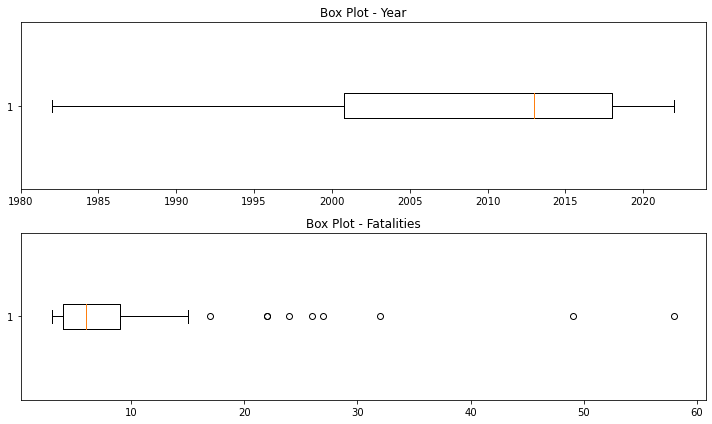

In [170]:
# Check for outliers in "Year" and "Fatalities" columns using box plots
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(data2['year'], vert=False)
plt.title("Box Plot - Year")
plt.subplot(2, 1, 2)
plt.boxplot(data2['fatalities'], vert=False)
plt.title("Box Plot - Fatalities")
plt.tight_layout()
plt.show()

By taking the logarithm transformation, we compress the range of the "Fatalities" column and mitigate the influence of extreme values. 

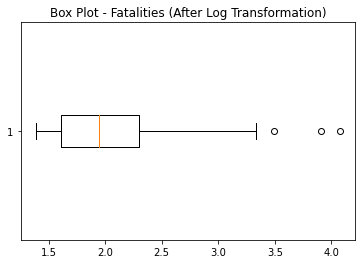

In [171]:
# Apply logarithm transformation to "Fatalities" column
data2['fatalities'] = data2['fatalities'].apply(lambda x: np.log1p(x))

# Check for outliers in "Fatalities" column after transformation using box plot
plt.boxplot(data2['fatalities'], vert=False)
plt.title("Box Plot - Fatalities (After Log Transformation)")
plt.show()

#### Handling Categorical Features

In [172]:
data2.head()

,year,fatalities,age_of_shooter,prior_signs_mental_health_issues,race,gender,weapon_type,location.1
0,2022,2.772589,18.000000,Yes,white,M,One semiautomatic handgun,School
1,2022,2.397895,18.000000,yes,White,M,semiautomatic rifle,workplace
2,2022,1.609438,33.741935,Yes,white,M,One semiautomatic handgun,Religious
3,2021,1.609438,15.000000,Yes,white,M,semiautomatic handgun,School
4,2021,2.302585,57.000000,yes,white,M,semiautomatic handguns,Workplace


In [203]:
# Inspecting the prior_signs_mental_health_issues column
print(data2['prior_signs_mental_health_issues'].value_counts())
print()
print(data2['race'].value_counts())
print()
print(data2['gender'].value_counts())
print()
print(data2['weapon_type'].value_counts())
print()
print(data2['location.1'].value_counts())


Yes         58
Unclear     23
-           18
No          17
TBD          5
yes          5
Unclear      1
Unknown      1
Name: prior_signs_mental_health_issues, dtype: int64

white              41
White              26
Black              12
-                  12
Latino             10
black               9
Asian               8
Other               5
Native American     3
unclear             1
White               1
Name: race, dtype: int64

Male             70
M                53
Female            2
Male & Female     2
F                 1
Name: gender, dtype: int64

One semiautomatic handgun                            18
semiautomatic handgun                                10
semiautomatic rifle                                   9
handgun                                               6
Two semiautomatic handguns                            6
                                                     ..
Two semiautomatic handguns, one shotgun               1
semiautomatic rifle; shotgun          

In [204]:
# Replace variations of 'yes' and 'no' with consistent values
data2['prior_signs_mental_health_issues'] = data2['prior_signs_mental_health_issues'].str.lower()
data2['prior_signs_mental_health_issues'].replace({'yes': 'yes', 'tbd': pd.NA, 'unclear': pd.NA, 'unknown': pd.NA, '-': pd.NA}, inplace=True)

# Check the cleaned values in 'prior_signs_mental_health_issues' column
print(data2['prior_signs_mental_health_issues'].value_counts())

yes         63
no          17
unclear      1
Name: prior_signs_mental_health_issues, dtype: int64


In [205]:
# Replace variations of 'race with consistent values
data2['race'].replace({'white': 'White', 'black': 'Black', })